In [1]:
!pip install cleantext

In [2]:
!pip install nlp_id

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 kB 16.2 MB/s eta 0:00:00
  Created wheel for nlp_id: filename=nlp_id-0.1.15.0-py3-none-any.whl size=58153891 sha256=44da1b83de5566a1d1c75a3b6f1bc4aff12a6393662276c7998aa8555a22fd19
  Stored in directory: /root/.cache/pip/wheels/85/34/2a/deaf7b7896a1eed336b874e1a7732588d40bb7bdc0a824e73e
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=a5f751a26f293346b2c789b5ef6f6560e43a434006f1fd9fff4e5d38a6c64e8d
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built nlp_id wget
  Attempting uninstall: pytest
    Found existing installation: pytest 7.4.3
    Uninstalling pytest-7.4.3:
      Successfully uninstalled pytest-7.4.3


In [3]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=171e1767669624db26db83fa3c9ac17bcd9d011358331cb947205f5e826648b5
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [4]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.1 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm


from cleantext import clean

from nlp_id.lemmatizer import Lemmatizer
from nlp_id.stopword import StopWord
from langdetect import detect
from nlp_id.stopword import StopWord
from nlp_id.lemmatizer import Lemmatizer
from nltk.tokenize import sent_tokenize

import tensorflow
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from tensorflow.keras.layers import Embedding
from tensorflow.keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer


import torch
import string
from torch.optim import AdamW
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_scheduler, Trainer, TrainingArguments
from datasets import Dataset, concatenate_datasets, DatasetDict, load_metric

pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings('ignore')

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
df_tbh = pd.read_excel('dataset_turnbackhoax_10k.xlsx')

In [8]:
df_tbh.head(3)

Title  \
0          [SALAH] Anies Baswedan Dekat Dengan Aliran Krsiten Sesat Alpha Omega di Papua   
1  [SALAH] Hakim Wahyu Iman Santoso Alami Kecelakaan Tunggal Usai Vonis Mati Ferdy Sambo   
2                                          [SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT   

           Timestamp  \
0      Maret 1, 2023   
1      Maret 1, 2023   
2  Februari 28, 2023   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [9]:
df_tbh['Tags'].value_counts()

Fitnah;Hasut;Hoax    9729
Lain-lain             577
Berita                 76
Events                  2
Name: Tags, dtype: int64

In [10]:
df_tbh['label'] = np.where(df_tbh['Tags'] == 'Fitnah;Hasut;Hoax', 1, 0)

In [11]:
df_cnn = pd.read_excel('dataset_cnn_10k.xlsx')

In [12]:
df_cnn['label'] = 0

In [13]:
train_data = pd.concat([df_tbh, df_cnn], axis=0)

In [14]:
train_data = train_data[['FullText', 'label']]

In [15]:
print(train_data['label'].value_counts())
print(train_data['label'].value_counts(normalize=True)*100)

0    10655
1     9729
Name: label, dtype: int64
0    52.271389
1    47.728611
Name: label, dtype: float64


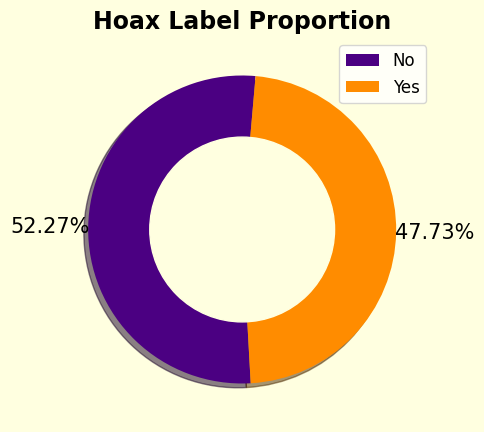

In [17]:
plt.figure(figsize=(6,5), facecolor='lightyellow')
plt.pie(train_data['label'].value_counts(), autopct='%.2f%%', pctdistance = 1.25,startangle=85, textprops={'fontsize': 15},
        colors=['indigo','darkorange'], shadow=True)
my_circle=plt.Circle( (0,0), 0.6, color='lightyellow')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Hoax Label Proportion', fontsize=17, fontweight='bold')
plt.legend(['No', 'Yes'], bbox_to_anchor=(1, 1), fontsize=12)


plt.show()

# Data Pre-Processing

## Lower case

In [18]:
def clean_lower(lwr):
    lwr = lwr.lower() # lowercase text
    return lwr


train_data['text_lower'] = train_data['FullText'].astype(str).apply(clean_lower)

## Remove Punctuation

In [19]:
clean_spcl = re.compile('[/(){}\[\]\|@,;]')
clean_symbol = re.compile('[^0-9a-z]')

def clean_punct(text):
    text = clean_spcl.sub('', text)
    text = clean_symbol.sub(' ', text)
    # Removing html tags
    text = re.sub('<[^>]*>', '', text)
    # Removing emails
    text = re.sub('\S*@\S*\s?', '', text)
    # Removing urls
    text = re.sub('https?://[A-Za-z0-9]','',text)
    # Remove extra spaces & numbers
    text = clean(text, extra_spaces=True, numbers=True)
    return text


# Buat kolom tambahan untuk data description yang telah diremovepunctuation
train_data['clean_punct'] = train_data['text_lower'].apply(clean_punct)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Remove Emoji

In [20]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U00002700-\U000027BF"  # Dingbats
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U00002600-\U000026FF"  # Miscellaneous Symbols
        u"\U0001F300-\U0001F5FF"  # Miscellaneous Symbols And Pictographs
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U0001F680-\U0001F6FF"  # Transport and Map Symbols
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

train_data['remove_emoji'] = train_data['clean_punct'].apply(remove_emojis)

## Remove double whitespace

In [21]:
def _normalize_whitespace(text):
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")

train_data['clean_double_ws'] = train_data['remove_emoji'].apply(_normalize_whitespace)

## Detecting languages on article. Only take Indonesia

In [22]:
def language_detect(text):
    text = detect(text)
    return text

In [23]:
train_data['language'] = train_data['clean_double_ws'].apply(language_detect)

In [24]:
train_data['language'].value_counts()

id    19789
tl      372
en      209
da       12
it        1
nl        1
Name: language, dtype: int64

In [25]:
train_data = train_data[(train_data['language'] == 'id')]

## Lemmatization

In [26]:
lemmatizer = Lemmatizer()
def lemmatization(text):
    text = lemmatizer.lemmatize(text)
    return text

In [27]:
train_data['lemmatization'] = train_data['clean_double_ws'].apply(lemmatization)

## Stopwords

In [28]:
stopword = StopWord()

In [29]:
stopword = StopWord()
def stopword_id(text):
    text = stopword.remove_stopword(text)
    return text

In [30]:
train_data['stopword'] = train_data['lemmatization'].apply(stopword_id)

# Data Split

In [ ]:
data_y = train_data['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train_data['stopword'], data_y, test_size=0.3, random_state=77)

In [ ]:
print('x_train : ', len(x_train))
print('x_test : ', len(x_test))

x_train :  13851
x_test :  5937


In [ ]:
Encoder = LabelEncoder()
ohe_enc = Encoder.fit(y_train)
y_train = ohe_enc.transform(y_train)
y_test = ohe_enc.transform(y_test)

# Load word2vec

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from gensim.models import KeyedVectors
filename = '/content/drive/MyDrive/Glove/glove.6B.100d.txt.word2vec'
w2v_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model[word] for word in words if word in w2v_model]
    if len(words_vecs) == 0:
        return np.zeros(50)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

x_train = np.array([vectorize(sentence) for sentence in x_train])
x_test = np.array([vectorize(sentence) for sentence in x_test])

# Modeling

In [ ]:
mlp = MLPClassifier(max_iter=120, random_state=5, hidden_layer_sizes=(110, 30), activation='tanh', learning_rate='adaptive')
mlp.fit(x_train, y_train)

predictionmlp_test = mlp.predict(x_test)
print(confusion_matrix(y_test, predictionmlp_test))
print("Akurasi dari Multilayer Perceptron adalah:", (accuracy_score(y_test, predictionmlp_test)*100) )
print("Recall dari Multilayer Perceptron adalah:",recall_score(y_test, predictionmlp_test)*100)
print("Precision dari Multilayer Perceptron adalah:",precision_score(y_test, predictionmlp_test)*100)
print("F1 dari Multilayer Perceptron adalah:",f1_score(y_test, predictionmlp_test)*100)

[[2895  210]
 [ 153 2679]]
Akurasi dari Multilayer Perceptron adalah: 93.88580090955028
Recall dari Multilayer Perceptron adalah: 94.59745762711864
Precision dari Multilayer Perceptron adalah: 92.73104880581516
F1 dari Multilayer Perceptron adalah: 93.65495542737284


In [ ]:
predictionmlp_train = mlp.predict(x_train)
print(confusion_matrix(y_train, predictionmlp_train))
print("Akurasi Training dari Multilayer Perceptron adalah:", (accuracy_score(y_train, predictionmlp_train)*100) )
print("Recall Training dari Multilayer Perceptron adalah:",recall_score(y_train, predictionmlp_train)*100)
print("Precision Training dari Multilayer Perceptron adalah:",precision_score(y_train, predictionmlp_train)*100)
print("F1 Training dari Multilayer Perceptron adalah:",f1_score(y_train, predictionmlp_train)*100)

[[6837  335]
 [ 127 6552]]
Akurasi Training dari Multilayer Perceptron adalah: 96.664500758068
Recall Training dari Multilayer Perceptron adalah: 98.09851774217697
Precision Training dari Multilayer Perceptron adalah: 95.13576303179903
F1 Training dari Multilayer Perceptron adalah: 96.59442724458202


In [ ]:
prediction_test = mlp.predict(x_test)
prediction_train = mlp.predict(x_train)
training_acc = accuracy_score(y_train, prediction_train)
testing_acc = accuracy_score(y_test, prediction_test)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))
print(classification_report(y_test, prediction_test))

Training Accuracy: 0.9666450075806801
Testing Accuracy: 0.9388580090955028
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3105
           1       0.93      0.95      0.94      2832

    accuracy                           0.94      5937
   macro avg       0.94      0.94      0.94      5937
weighted avg       0.94      0.94      0.94      5937



In [ ]:
prediction_test = mlp.predict(x_test)
prediction_train = mlp.predict(x_train)
training_acc = accuracy_score(y_train, prediction_train)
testing_acc = accuracy_score(y_test, prediction_test)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))
print(classification_report(y_train, prediction_train))

Training Accuracy: 0.9666450075806801
Testing Accuracy: 0.9388580090955028
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      7172
           1       0.95      0.98      0.97      6679

    accuracy                           0.97     13851
   macro avg       0.97      0.97      0.97     13851
weighted avg       0.97      0.97      0.97     13851



# Analysis

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train_data['stopword'], data_y, test_size=0.3, random_state=77)

In [ ]:
train_words = pd.DataFrame(x_train.tolist(), columns=['word'])
words_train = {
    x for x in ' '.join(
        train_words.word.tolist()
    ).split() if x.isalpha()
}

In [ ]:
test_words = pd.DataFrame(x_test.tolist(), columns=['word'])
words_test = {
    x for x in ' '.join(
        test_words.word.tolist()
    ).split() if x.isalpha()
}

In [ ]:
word_no_test = []
for i in words_train:
    if i not in words_test:
        word_no_test.append(i)

In [ ]:
len(word_no_test)

81101

In [ ]:
word_no_train = []
for i in words_test:
    if i not in words_train:
        word_no_train.append(i)

In [ ]:
len(word_no_train)

31305

In [ ]:
from collections import Counter

# split() returns list of all the words in the string
split_it = str(x_test).split()

# Pass the split_it list to instance of Counter class.
Counters_found = Counter(split_it)
#print(Counters)

# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counters_found.most_common(10)
df_test_occ = pd.DataFrame(most_occur, columns=['word', 'count'])
print(most_occur)

[('covid', 20), ('prakerja', 19), ('https', 18), ('video', 17), ('partai', 16), ('pusat', 15), ('bandara', 15), ('kerja', 14), ('lihat', 13), ('tak', 13)]


In [ ]:
from collections import Counter

# split() returns list of all the words in the string
split_it = str(x_train).split()

# Pass the split_it list to instance of Counter class.
Counters_found = Counter(split_it)
#print(Counters)

# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counters_found.most_common(10)
df_train_occ = pd.DataFrame(most_occur, columns=['word', 'count'])
print(most_occur)

[('https', 23), ('kendari', 22), ('dandim', 20), ('indonesia', 18), ('orang', 15), ('jabat', 15), ('facebook', 14), ('ahok', 14), ('rudi', 14), ('presiden', 13)]


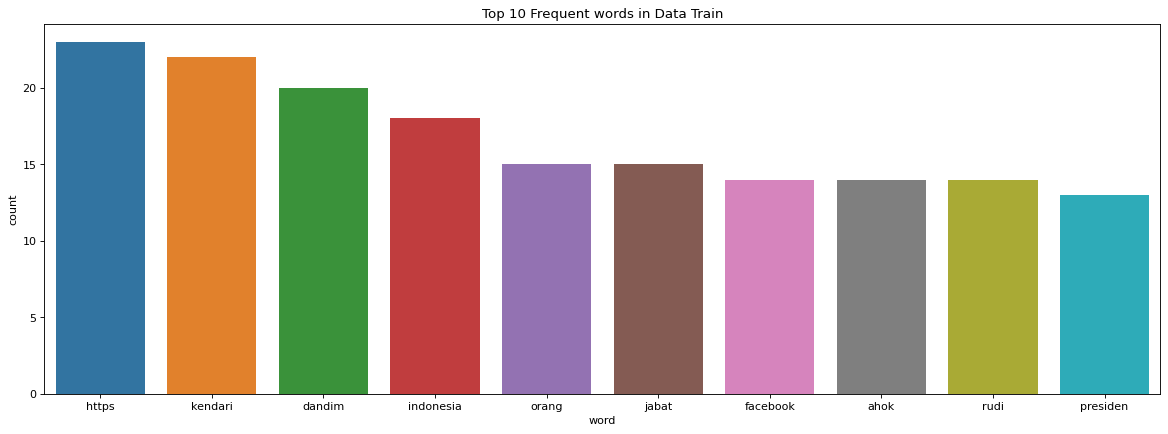

In [ ]:
plt.figure(figsize=(18, 6), dpi=80)
sns.barplot(data = df_train_occ, x = 'word', y = 'count')
plt.title('Top 10 Frequent words in Data Train')

plt.show()

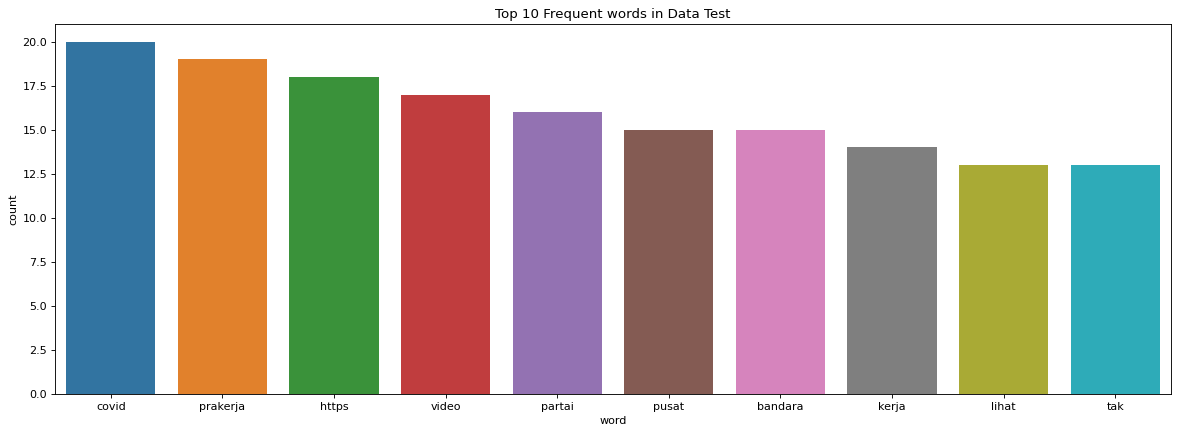

In [ ]:
plt.figure(figsize=(18, 6), dpi=80)
sns.barplot(data = df_test_occ, x = 'word', y = 'count')
plt.title('Top 10 Frequent words in Data Test')

plt.show()

In [ ]:
df_xtest = pd.DataFrame(x_test)
df_ytest = pd.DataFrame(y_test)
df_ypred = pd.DataFrame(prediction_test, columns=['prediction'])

In [ ]:
df_ypred.shape

(5937, 1)

In [ ]:
test_result = pd.concat([df_xtest, df_ytest], axis=1, ignore_index=True).reset_index()
test_result = pd.concat([test_result, df_ypred], axis=1, ignore_index=True)
test_result = test_result.rename(columns={1:'words', 2:'label', 3:'prediction'}).drop(0, axis=1)

In [ ]:
df_fp = test_result[(test_result['label'] == 0) & (test_result['prediction'] == 1)]

In [ ]:
df_fn = test_result[(test_result['label'] == 1) & (test_result['prediction'] == 0)]

In [ ]:
df_tp = test_result[(test_result['label'] == 1) & (test_result['prediction'] == 1)]

In [ ]:
df_tn = test_result[(test_result['label'] == 0) & (test_result['prediction'] == 0)]

In [ ]:
from collections import Counter

# split() returns list of all the words in the string
split_it = str(df_fp['words']).split()

# Pass the split_it list to instance of Counter class.
Counters_found = Counter(split_it)
#print(Counters)

# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counters_found.most_common(10)
occ_fp_test = pd.DataFrame(most_occur, columns=['word', 'count'])
print(most_occur)

[('shalat', 39), ('jalan', 29), ('https', 25), ('masjid', 24), ('akun', 22), ('facebook', 20), ('presiden', 19), ('pocong', 18), ('listrik', 18), ('jakarta', 18)]


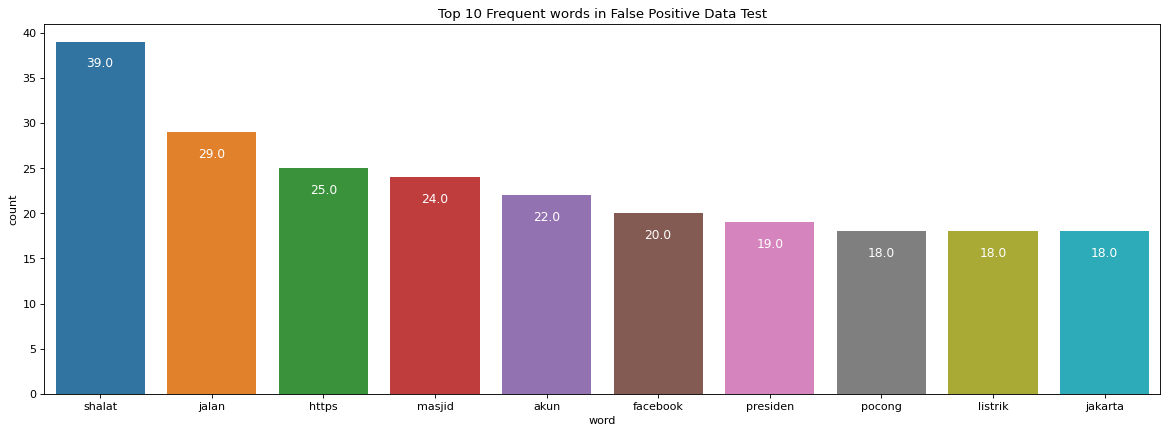

In [ ]:
plt.figure(figsize=(18, 6), dpi=80)
ax = sns.barplot(data = occ_fp_test, x = 'word', y = 'count')
plt.title('Top 10 Frequent words in False Positive Data Test')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=11)

plt.show()

In [ ]:
from collections import Counter

# split() returns list of all the words in the string
split_it = str(df_fn['words']).split()

# Pass the split_it list to instance of Counter class.
Counters_found = Counter(split_it)
#print(Counters)

# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counters_found.most_common(10)
occ_fn_test = pd.DataFrame(most_occur, columns=['word', 'count'])
print(most_occur)

[('ugm', 36), ('presiden', 35), ('stan', 27), ('https', 26), ('negara', 26), ('indonesia', 23), ('kewarganegaraan', 22), ('laku', 21), ('jokowi', 21), ('berita', 19)]


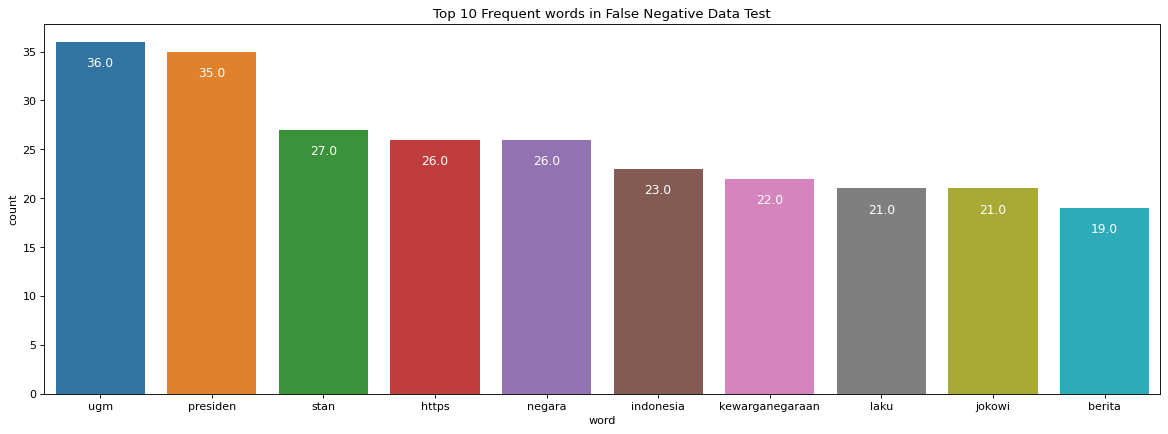

In [ ]:
plt.figure(figsize=(18, 6), dpi=80)
ax = sns.barplot(data = occ_fn_test, x = 'word', y = 'count')
plt.title('Top 10 Frequent words in False Negative Data Test')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=11)

plt.show()

In [ ]:
from collections import Counter

# split() returns list of all the words in the string
split_it = str(df_tp['words']).split()

# Pass the split_it list to instance of Counter class.
Counters_found = Counter(split_it)
#print(Counters)

# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counters_found.most_common(10)
occ_tp_test = pd.DataFrame(most_occur, columns=['word', 'count'])
print(most_occur)

[('https', 27), ('video', 22), ('covid', 20), ('artikel', 20), ('prakerja', 19), ('judul', 18), ('jalan', 18), ('surat', 17), ('narasi', 15), ('fakta', 15)]


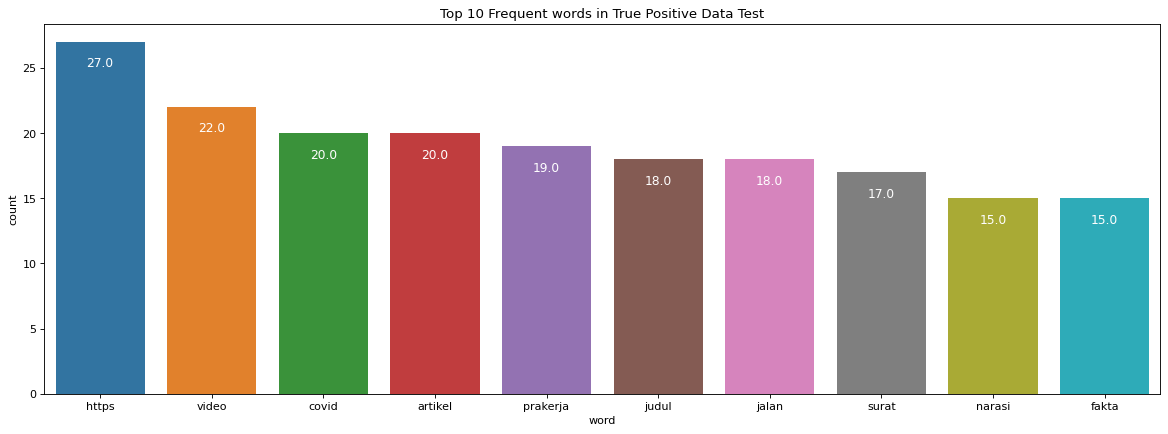

In [ ]:
plt.figure(figsize=(18, 6), dpi=80)
ax = sns.barplot(data = occ_tp_test, x = 'word', y = 'count')
plt.title('Top 10 Frequent words in True Positive Data Test')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=11)

plt.show()

In [ ]:
from collections import Counter

# split() returns list of all the words in the string
split_it = str(df_tn['words']).split()

# Pass the split_it list to instance of Counter class.
Counters_found = Counter(split_it)
#print(Counters)

# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counters_found.most_common(10)
occ_tn_test = pd.DataFrame(most_occur, columns=['word', 'count'])
print(most_occur)

[('dpr', 29), ('partai', 27), ('lihat', 26), ('papua', 25), ('milu', 24), ('cnn', 20), ('presiden', 19), ('jokowi', 19), ('indonesia', 17), ('jakarta', 16)]


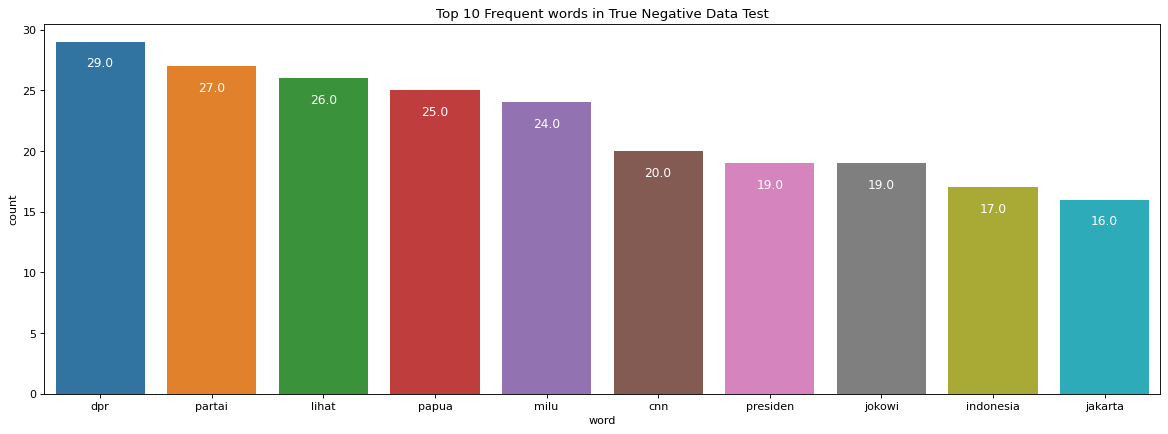

In [ ]:
plt.figure(figsize=(18, 6), dpi=80)
ax = sns.barplot(data = occ_tn_test, x = 'word', y = 'count')
plt.title('Top 10 Frequent words in True Negative Data Test')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=11)

plt.show()

# LSTM (Deep Learning)

In [31]:
all_text=train_data['stopword'].to_numpy()

In [32]:
all_cleaned_text = np.array([text for text in all_text])

In [33]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_cleaned_text)

In [34]:
all_encoded_texts = np.array(tokenizer.texts_to_sequences(all_cleaned_text))

In [35]:
all_encoded_texts = pad_sequences(all_encoded_texts, maxlen=600)

In [36]:
all_encoded_texts.shape

(19789, 600)

In [37]:
total_labels = len(train_data['label'].unique())
total_labels

2

In [38]:
all_labels = np.array(train_data['label'])[:, np.newaxis]

In [39]:
ohe = OneHotEncoder(sparse=False)
all_labels = ohe.fit_transform(all_labels)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(all_encoded_texts, all_labels, test_size=0.1, random_state=5,
                                                    stratify=all_labels)

In [41]:
x_train.shape

(17810, 600)

In [42]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=200, input_length=600))
model.add(LSTM(125, dropout=0.25))
model.add(Dense(total_labels, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['AUC'])

In [43]:
history = model.fit(x_train, y_train, epochs=3, batch_size=32, validation_split=0.2)

Epoch 1/3
446/446 [==============================] - 1073s 2s/step - loss: 0.1197 - auc: 0.9909 - val_loss: 0.1007 - val_auc: 0.9938
Epoch 2/3
446/446 [==============================] - 1042s 2s/step - loss: 0.0338 - auc: 0.9992 - val_loss: 0.1328 - val_auc: 0.9931
Epoch 3/3
446/446 [==============================] - 1010s 2s/step - loss: 0.0060 - auc: 1.0000 - val_loss: 0.1854 - val_auc: 0.9921


In [44]:
scores_test = model.evaluate(x_test, y_test, verbose=0)
scores_train = model.evaluate(x_train, y_train, verbose=0)

In [45]:
print("AUC Test: %.2f%%" % (scores_test[1]*100))
print("AUC Train: %.2f%%" % (scores_train[1]*100))

AUC Test: 99.22%
AUC Train: 99.93%


In [46]:
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

557/557 [==============================] - 216s 389ms/step


In [47]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_test = np.argmax(y_pred, axis=1)

y_train_class = np.argmax(y_train, axis=1)
y_pred_train = np.argmax(y_pred_train, axis=1)

In [48]:
print(confusion_matrix(y_test_class, y_pred_test))
print("Akurasi Testing dari LSTM adalah: %.2f" % (accuracy_score(y_test_class, y_pred_test)*100) )
print("Recall Testing dari LSTM adalah:",recall_score(y_test_class, y_pred_test)*100)
print("Precision Testing dari LSTM adalah:",precision_score(y_test_class, y_pred_test)*100)
print("F1 Testing dari  LSTM adalah:",f1_score(y_test_class, y_pred_test)*100)

[[971  57]
 [ 26 925]]
Akurasi Testing dari LSTM adalah: 95.81
Recall Testing dari LSTM adalah: 97.26603575184016
Precision Testing dari LSTM adalah: 94.19551934826885
F1 Testing dari  LSTM adalah: 95.70615623383341


In [49]:
print(confusion_matrix(y_train_class, y_pred_train))
print("Akurasi Training dari LSTM adalah: %.2f" % (accuracy_score(y_train_class, y_pred_train)*100) )
print("Recall Training dari LSTM adalah:",recall_score(y_train_class, y_pred_train)*100)
print("Precision Training dari LSTM adalah:",precision_score(y_train_class, y_pred_train)*100)
print("F1 Training dari LSTM adalah:",f1_score(y_train_class, y_pred_train)*100)

[[9137  113]
 [  40 8520]]
Akurasi Training dari LSTM adalah: 99.14
Recall Training dari LSTM adalah: 99.53271028037383
Precision Training dari LSTM adalah: 98.69106915324916
F1 Training dari LSTM adalah: 99.11010294887454


In [50]:
training_acc = accuracy_score(y_train_class, y_pred_train)
testing_acc = accuracy_score(y_test_class, y_pred_test)

print("Classification Report Testing")
print(classification_report(y_test_class, y_pred_test))

Classification Report Testing
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1028
           1       0.94      0.97      0.96       951

    accuracy                           0.96      1979
   macro avg       0.96      0.96      0.96      1979
weighted avg       0.96      0.96      0.96      1979



In [51]:
training_acc = accuracy_score(y_train_class, y_pred_train)
testing_acc = accuracy_score(y_test_class, y_pred_test)

print("Classification Report Training")
print(classification_report(y_train_class, y_pred_train))

Classification Report Training
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9250
           1       0.99      1.00      0.99      8560

    accuracy                           0.99     17810
   macro avg       0.99      0.99      0.99     17810
weighted avg       0.99      0.99      0.99     17810

